# **Final Project (Classification of Skin Cancer Images)**

In [11]:
# Import libraries
import pandas as pd
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt


## Load the data from the Csv file

Describe the Data and expand on their short-form names for clarity

In [3]:
# Load the metadata of the 10,000 skin images (Data about the image data)
df = pd.read_csv('./HAM10000_metadata.csv')

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


**Short-form Notation**

**dx**

akeic = Actinic keratoses and intraepithelial carcinoma / Bowen's disease

bcc = basal cell carcinoma

solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl = benign keratosis-like lesions

df = dermatofibroma

mel = melanoma

nv = melanocytic nevi

angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc = melanocytic nevi (nv) and vascular lesions

**dx_type**

histo = histopathology

follow_up = follow-up examination

consensus = expert consensus

confocal = in-vivo confocal microscopy


# **1 - Data Pre-Processing**

In [4]:
# Remove NULL values from the dataset
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

Since their is 57 NULL values in the age column, remove those values from the data

In [5]:
df = df.dropna(subset=['age'])

# Check if the NULL values have been successfully removed
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

Add the corresponding image path to the metadata csv file

In [6]:
# Merge skin cancer images for the correct path to view
imagePath = './HAM10000_images'

# Pull out the ids from the 'image_id' column
df['full_image_path'] = imagePath + '/' + df['image_id'] + '.jpg'

# Check if the correct image path got added to the dataframe
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,full_image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,./HAM10000_images/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,./HAM10000_images/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,./HAM10000_images/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,./HAM10000_images/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,./HAM10000_images/ISIC_0031633.jpg


Transform the 'dx' and 'dx_type' columns into equivalent numerical values

In [7]:
# Change dx to a numerical value for the ML model interpretation
# Using the Label Encoding method
df['dx_numerical'] = df['dx'].astype('category').cat.codes

# Change dx_type to a numerical value for the ML model interpretation
# Using the Label Encoding method
df['dx_type_numerical'] = df['dx_type'].astype('category').cat.codes

# Check in data
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,full_image_path,dx_numerical,dx_type_numerical
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,./HAM10000_images/ISIC_0027419.jpg,2,3
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,./HAM10000_images/ISIC_0025030.jpg,2,3
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,./HAM10000_images/ISIC_0026769.jpg,2,3
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,./HAM10000_images/ISIC_0025661.jpg,2,3
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,./HAM10000_images/ISIC_0031633.jpg,2,3


# **2 - Image Pre-processing**

In [ ]:
# Load the images into the notebook
# img = cv2.imread('image1.png', cv2.IMREAD_GRAYSCALE)

# Create a new column for the images (125:w by 100:h)
df['skin_image'] = df['full_image_path'].map(lambda x: np.asarray(Image.open(x).resize((125, 100))))

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,full_image_path,dx_numerical,dx_type_numerical,skin_image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,./HAM10000_images/ISIC_0027419.jpg,2,3,"[[[189, 152, 194], [192, 156, 198], [191, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,./HAM10000_images/ISIC_0025030.jpg,2,3,"[[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,./HAM10000_images/ISIC_0026769.jpg,2,3,"[[[186, 127, 135], [189, 133, 145], [192, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,./HAM10000_images/ISIC_0025661.jpg,2,3,"[[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,./HAM10000_images/ISIC_0031633.jpg,2,3,"[[[131, 88, 110], [142, 97, 120], [152, 107, 1..."


In [ ]:
# print(df)

         lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

                          full_image_path  dx_numerical  dx_typ

# **3 - Data Visualization w/h Graphs**

Text(0, 0.5, 'Image Count')

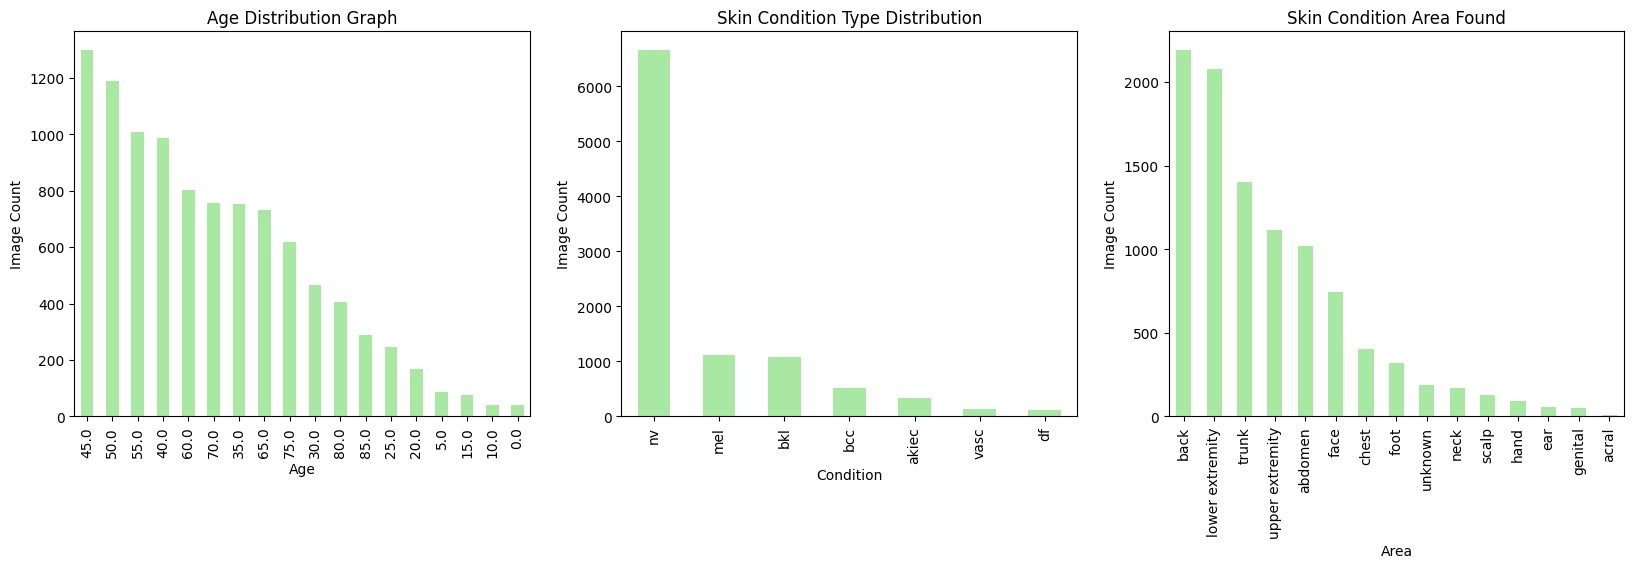

In [ ]:
plt.figure(figsize=(20, 5))

# Plot the ages
plt.subplot(1, 3, 1)
plt.title("Age Distribution Graph")
df['age'].value_counts().plot.bar(color='#A8E8A3')
plt.xlabel("Age")
plt.ylabel("Image Count")

# Plot the Skin Condition Type
plt.subplot(1, 3, 2)
plt.title("Skin Condition Type Distribution")
df['dx'].value_counts().plot.bar(color='#A8E8A3')
plt.xlabel("Condition")
plt.ylabel("Image Count")

# Plot the Area Skin Condition was found
plt.subplot(1, 3, 3)
plt.title("Skin Condition Area Found")
df['localization'].value_counts().plot.bar(color='#A8E8A3')
plt.xlabel("Area")
plt.ylabel("Image Count")
